# Coin games: classical and quantum

In this notebook we play a set of interesting coin tossing games using coins obeying classical (games 1-2) and quantum (game 3) mechanics.

### Game 1: Gambler's ruin

A gambler enters the casino with a bankroll of size $b$, and repeatedly plays a game where one wins 1 with probability $p$ and loses 1 with probability $1 - p$. The gambler stops playing if the bankroll reaches $0$ or the house limit $g$. We can ask questions such as

<ol>
    <li>What is the probability that the gambler loses it all / hits the house limit / neither?</li>
    <li>What is the probability that the gambler loses it all in a game without a house limit?</li>
    <li>How many games will the gambler need to play on average to leave the casino?</li>
</ol>

### Game 2: Questionable gamble

We are presented with the following bet: On flipping 1000 fair coins, if 550 or more land on heads we win EUR 20; otherwise the bet is lost. Should we play this game for EUR 10?

### Game 3: Gambling in a quantum casino (flipping a Hadamard coin)

We encountered a classical random walk in Game 1. What happens when the gambler is allowed to simultaneosly win *and* lose conditional on the outcome of a *quantum coin*? What happens when we gamble in a casino obeying quantum laws? We learned in Game 1 what happens in the classical casino where the gambler either wins or loses $-$ and not both at the same time $-$ in a given game, but in the quantum world things are not quite so simple.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Playing the games

### Game 1

Game 1 represents a *Markov chain* on a countable state space that follows a random walk. If we denote by the random variable $B_t$ the bankroll at toss $t$ with $B_0 = b$, then the sequence $\lbrace B_t : t \in \mathbb{N} \rbrace$ is a Markov process. The state at toss $t+1$ only depends on the state at $t$; there is no memory.

Let's denote the probability that the gambler loses it all with a bankroll of $b$ by $u_b$. To obtain the asked probabilities, we can condition on the first toss using the law of total probability: 

$$\begin{split}u_b &= \text{P(ruin | win first)P(win first) + P(ruin | lose first)P(lose first)} \\
&= u_{b + 1}p + u_{b - 1}(1 - p)
\end{split}
$$

This is defined for $0 < b < M$ with the boundary conditions $u_0 = 1$ and $u_g = 0$. The solution is

$$ u_b = \cases{\frac{\left(\frac{1-p}{p}\right)^b - \left(\frac{1-p}{p}\right)^g}{1 - \left(\frac{1-p}{p}\right)^g}, \qquad  p \neq \frac{1}{2} \\
1 - \frac{k}{g}, \,\,\,\,\qquad\qquad p = \frac{1}{2} }
$$

Similarly, the probability $v_b$ that the gambler reaches the house limit starting with a bankroll of $b$ is defined by the same recurrence relation, but the boundary conditions are $v_0 = 0$ and $v_g = 1$. We find $v_b = 1 - u_b$. The probability that the gambler plays forever is zero.

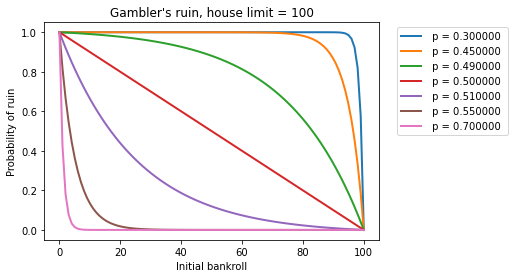

In [2]:
u = lambda k,p,N: (((1-p)/p)**k -((1-p)/p)**N)  / (1 - ((1-p)/p)**N);
# Evaluating u for p < 1/2 runs into numerical problems with the large fractions. Let us regroup:
u1 = lambda k,p,N: (((1-p)/p)**(k-N) -1)  / (((1-p)/p)**(-N) - 1);
uhalf = lambda k,N: 1 - k/N;

ww = lambda p, b, g : (1.-((1.-p)/p)**b) / (1.-((1.-p)/p)**g) if p != 0.5 else b/g

def w(p, b, g):
  if (b <= 0):
    return 0
  elif b >= g:
    return 1
  elif (p == 0):
    return 0
  elif (p == 1):
    return 1
  elif (p == 0.5):
    return b/g
  else:
    return (1.-((1.-p)/p)**b) / (1.-((1.-p)/p)**g)

def SimulateGame1_1(k,p,N):
    NGames = 50; # number of games we simulate. The higher the closer to the 'frequentist' prob.
    ret = [];
    for ktmp in k:   
        ktmp = int(ktmp);
        Nruins = 0; # number of ruins we have encountered for this k
        for i1 in range(NGames):
            ktmp1 = ktmp;
            while (True): 
                if (ktmp1 == 0):
                    Nruins += 1;
                    break;
                if (ktmp1 == N): break;
                if (np.random.uniform(0,1) <= p): ktmp1 += 1;
                else: ktmp1 += -1;
        ret.append(Nruins/NGames); # prob of ruin for this k
    return ret;
        
N = 100;        
krange=np.linspace(0, N, num=100);
plist = [0.3,0.45,0.49, 0.5, 0.51,0.55,0.7];

for p in plist:
    plt.plot(krange, 1-ww(p,krange,N), linewidth=2, label=" p = %f "%(p)); 
    #plt.plot(krange, [w(p,b,N) for b in krange], linewidth=2, label=" p = %f "%(p)); 
    #plt.plot(krange, u(krange,p,N), linewidth=2, label=" p = %f "%(p)); 
    #plt.plot(krange, u1(krange,p,N), linewidth=2, label=" p = %f "%(p)); 
    #plt.plot(krange, SimulateGame1_1(krange,p,N),color='#c42d41', alpha=0.6);
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left");
plt.title('Gambler\'s ruin, house limit = %d'%(N));
plt.xlabel('Initial bankroll');plt.ylabel('Probability of ruin');
plt.show();

Omitting the detailed proof, taking the limit $N \to \infty$ gives the correct result for the case without a house limit,

$$ \lim_{N \to \infty} u_k = \cases{\left(\frac{1-p}{p}\right)^k, \qquad p > \frac{1}{2} \\
1, \,\,\,\,\qquad\qquad p \leq \frac{1}{2} }
$$

Therefore, in a fair and unfavourably biased game the gambler always loses no matter the initial bankroll size. In a game that is favourably biased, however, there is a finite probability to never go bankcrupt, which becomes better the larger the initial bankroll and more favourable the bias.

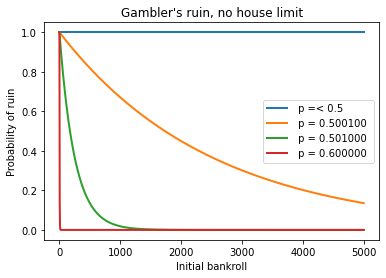

In [3]:
uNinf = lambda k,p: ((1-p)/p)**k;
uNinfhalf = lambda k: k**0;
krange=np.linspace(0, 5000, num=1000);
plist = [0.5001,0.501,0.6];

plt.plot(krange, uNinfhalf(krange), linewidth=2, label=" p =< 0.5 ");    

for p in plist:
    plt.plot(krange, uNinf(krange,p), linewidth=2, label=" p = %f "%(p));

plt.legend(loc="best");
plt.title('Gambler\'s ruin, no house limit');
plt.xlabel('Initial bankroll');plt.ylabel('Probability of ruin');
plt.show();

To find the expected number of games to be played before reaching $0$ or $N$, $E_k \equiv E(Y_k)$, where the random variable $Y_k$ is the number of games needed starting with bankroll $k$, we can again condition on the first game:

$$\begin{split}E_k &= \text{E(}Y_k\text{ | win first)P(win first) + E(}Y_k\text{ | lose first)P(lose first)} \\
&= (1 + E_{k + 1})p + (1 + E_{k - 1})(1 - p)
\end{split}
$$

with the boundary conditions $E_0 = E_N = 0$. Using the standard theory of recurrence relations, we find

$$ E_k = \cases{\frac{N}{2 p - 1} \frac{1- \left(\frac{1-p}{p}\right)^k}{1 - \left(\frac{1-p}{p}\right)^N} - \frac{k}{2 p - 1}, \qquad  p \neq \frac{1}{2} \\
N k - k^2, \,\,\,\,\qquad\qquad p = \frac{1}{2} }
$$

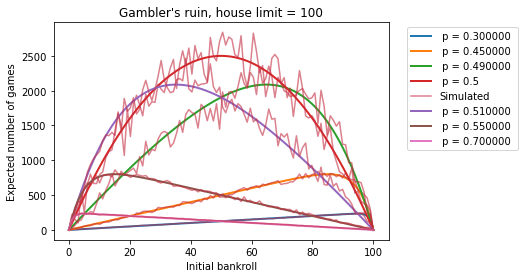

In [4]:
E = lambda k,p,N: (N/(2*p - 1))*((1 - ((1-p)/p)**k)/(1 - ((1-p)/p)**N)) - k/(2*p - 1);
# Evaluating E for p < 1/2 runs into numerical problems with the large fractions. Let us regroup:
E1 = lambda k,p,N: (N/(2*p - 1))*(((1 - ((1-p)/p)**k)*((1-p)/p)**(-N))/(((1-p)/p)**(-N) - 1)) - k/(2*p - 1);
Ehalf = lambda k,N: N*k - k**2;

def SimulateGame1_3(k,p,N):
    NGames = 100; # number of games we simulate, and then average over.
    ret = [];
    for ktmp in k:   
        ktmp = int(ktmp);
        playresults = []; # temp array of results that we finally average over
        for i1 in range(NGames):
            Nplays = 1; # number of games we have managed to play for this k
            ktmp1 = ktmp;
            while (True): 
                if (ktmp1 == 0) or (ktmp1 == N): break;
                if (np.random.uniform(0,1) <= p): ktmp1 += 1;
                else: ktmp1 += -1;
                Nplays += 1;
            playresults.append(Nplays);
        ret.append(np.mean(playresults)); # Expected number of games for this k
    return ret;


N = 100;        
krange=np.linspace(0, N, num=100);
plist = [0.51,0.55,0.7];
p1list = [0.3,0.45,0.49];


for p in p1list:
    plt.plot(krange, E1(krange,p,N), linewidth=2, label=" p = %f "%(p)); 
    plt.plot(krange, SimulateGame1_3(krange,p,N),color='#c42d41', alpha=0.6);
    
plt.plot(krange, Ehalf(krange,N), linewidth=2, label=" p = 0.5 ");
plt.plot(krange, SimulateGame1_3(krange,0.5,N),color='#c42d41', alpha=0.6, label = 'Simulated');

for p in plist:
    plt.plot(krange, E(krange,p,N), linewidth=2, label=" p = %f "%(p));
    plt.plot(krange, SimulateGame1_3(krange,p,N),color='#c42d41', alpha=0.6);
    

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left");
plt.title('Gambler\'s ruin, house limit = %d'%(N));
plt.xlabel('Initial bankroll');plt.ylabel('Expected number of games');
plt.show();

### Game 2

Let $X_N$ be the random variable denoting the number of heads in a series of $N$ coin tosses. The corresponding probability density function is the binomial distribution,

$$ X_N \sim \text{Binomial}(p, N),$$

where $p = 0.5$ for a fair coin. The mean is $Np$ and the variance is $Np(1-p)$. For large $N$, certainly for $N = 1000$, the Central Limit Theorem asserts that the binomial distribution can be approximated by a Gaussian:

$$ X_N \sim \text{N}[Np, Np(1-p)].$$

To answer the question of whether or not to take the bet, let us consider the expectation of its payout:

$$\begin{split}E\text{(game 2)} &= E(\text{win})P(\text{win}) + E(\text{lose})P(\text{lose}) \\
&= (-10 + 20)P(\text{win}) + (-10)P(\text{lose}) \\
&= -10 + 20P(\text{win})\\
&= -10 + 20P(X_{1000} > 550).
\end{split}$$

Let us evaluate the probability numerically:

3.1622776601683795
0.0007827011290012509


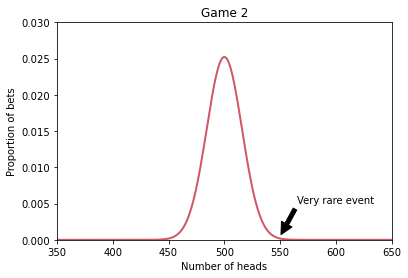

In [5]:
from scipy.stats import norm

Gaussian = lambda x,mu,var: np.exp(-(x - mu)**2.0 / (2.0 * var))/np.sqrt(2.0*np.pi*var);
xmin = 350; xmax = 650;
xrange=np.linspace(xmin, xmax, num=xmax - xmin);

headprob = 0.5;
Ntosses = 1000;
mub = Ntosses*headprob;
varb = Ntosses*headprob*(1 - headprob);

# We must normalize the Gaussian:
z = (550 - mub)/np.sqrt(varb);
print(z);
print(1-norm.cdf(z));


plt.xlim(xmin,xmax);
plt.ylim(0,0.03);
plt.plot(xrange, Gaussian(xrange, mub, varb),color='#c42d41',alpha=0.8,linewidth=2);
plt.xlabel('Number of heads');plt.ylabel('Proportion of bets');

plt.annotate('Very rare event', xy=(550, 0.0005), xytext=(565, 0.005),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.title('Game 2');
plt.show();

We see that the needed number of heads, 550 out of 1000 tosses, is 3.16 standard deviations away from the mean. The probability $P(X_{1000} > 550) \approx 0.0008.$ The expectation becomes

$$E\text{(game 2)} = -10 + 20\times 0.0008 \approx -9.98.$$

This game should certainly not be played. The bet can be taken when $E\text{(game 2)}>0$, for example when the game costs EUR 0.016 or less with a payout of EUR 20, or pays EUR 12500 or more for the bet price of EUR 10. 

### Game 3

This time we are dealing with a *Discrete Time Quantum Walk*. There are many interesting features to study, but let us focus our attention here to calculating the expected winnings when gambling in a quantum casino, similarly in spirit to Game 1.

Let us introduce our gambler named $\left|{\psi}\right\rangle$ who is in a quantum superposition of 'lucky' (L) and 'unlucky' (U), 

$$\left|{\psi}\right\rangle = g_1 \left|{L}\right\rangle + g_2 \left|{U}\right\rangle,$$ 

where $g_{1,2} \in \mathbb{C}$ such that $|g_1|^2 + |g_2|^2 = 1$. The quantum casino named $\left|{\phi}\right\rangle$, like the classical one, accommodates for all non-zero bankrolls (B) within the house limit $N$ ($\mathbb{N}_N = \lbrace 1, \ldots, N-1 \rbrace$):

$$\left|{\phi}\right\rangle = \sum_{B \in \mathbb{N}_N} c_B \left|{B}\right\rangle,$$ 

where $c_B \in \mathbb{C}$ such that $\sum_{B \in \mathbb{N}_N} |c_B|^2 = 1$. In a relaxed casino $\mathbb{N}_N \to \mathbb{Z}$. Assuming the gambler and the casino are not entangled, the total state of the system, $\left|{\psi}\right\rangle$, is then the product state

$$\left|{\psi}\right\rangle = \left|{\phi}\right\rangle \otimes \left|{\psi}\right\rangle.$$

The game operates as follows: *First, the gambler flips a quantum coin that determines the luck state. For the component of the gambler in the state 'lucky' the bankroll jumps up by 1; conversely, if the gambler is in the state 'unlucky', the bankroll jumps down by 1*. The gamble operator $G$ is then

$$G = \sum_{B \in \mathbb{N}_N} \left|{B+1}\right\rangle\left\langle{B}\right| \otimes \left|{L}\right\rangle\left\langle{L}\right| +  \sum_{B \in \mathbb{N}_N} \left|{B-1}\right\rangle\left\langle{B}\right| \otimes \left|{U}\right\rangle\left\langle{U}\right|. $$

The coin toss that determines the state of the gambler is taken to be the Hadamard coin, which in the basis $\left|{U}\right\rangle = (1,0)^\mathrm{T}$ and $\left|{L}\right\rangle = (0,1)^\mathrm{T}$ reads
 
$$H =  \frac{1}{\sqrt{2}}\begin{pmatrix}1 & \;\;1\\ 1 & -1\\\end{pmatrix}. $$

The total operator progressing the walk by one step, $S$, is then given by

$$\begin{split} 
S &= G(\text{Id} \otimes H),
\end{split}
$$

where the identity operation on the bankroll space reflects the fact that the bankroll is not modified during the coin flip $H$. The state after $k$ gambles is

$$S^k \ket{\Psi_0}, $$

where $\ket{\Psi_0}$ is the initial state.

In our chosen basis $\left|{U}\right\rangle\left\langle{U}\right| = \begin{pmatrix}1 & 0\\ 0 & 0\\\end{pmatrix}$ and  $\left|{L}\right\rangle\left\langle{L}\right| = \begin{pmatrix}0 & 0\\ 0 & 1\\\end{pmatrix}$. Let us adopt the basis $\left|{B}\right\rangle = (0, \ldots, 1, \ldots, 0)^\mathrm{T}$ where the '1' occurs at position $B \in \mathbb{N}_N = \lbrace 1, \ldots, N-1 \rbrace$, and rest of the $N - 1$ entries are zero. Then

$$ \begin{split} \sum_{B \in \mathbb{N}_N} \left|{B-1}\right\rangle\left\langle{B}\right| &= \begin{pmatrix}0 & 1 & & & \\  & 0 & 1& & \\ & & \ddots & & \\ & &  & 0 & 1\\ & &  &  & 0 \end{pmatrix}, \\
& \\
\sum_{B \in \mathbb{N}_N} \left|{B+1}\right\rangle\left\langle{B}\right| &= \begin{pmatrix}0 &  & & & \\ 1 & 0 & & &  \\ & & \ddots & & \\ & & 1 & 0 & \\ & &  & 1 & 0 \end{pmatrix},
\end{split}
$$

where the matrices are $(N - 1) \times (N - 1)$ in size.



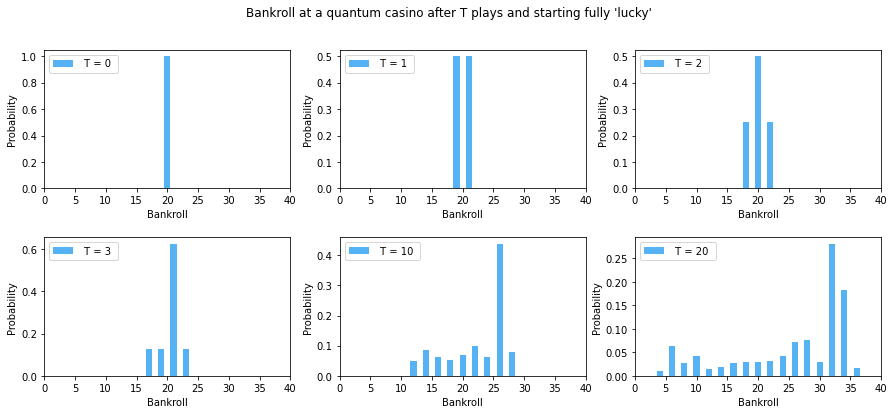

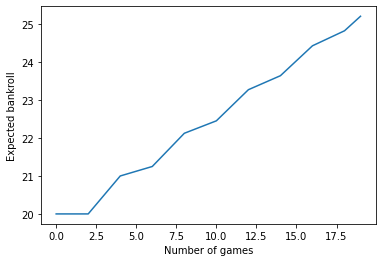

In [6]:
from scipy import sparse

# Matrix representations of the operators
bvecU = np.array([1,0]); # gambler basis vectors
bvecL = np.array([0,1]);
NBankR = 40; # House limit
BankRmatdim = NBankR - 1;
bvecBankR = np.arange(1,NBankR);
matWin = sparse.spdiags([1]*(BankRmatdim -1),-1,BankRmatdim ,BankRmatdim );
matLose = sparse.spdiags([1]*(BankRmatdim -1),1,BankRmatdim ,BankRmatdim ); 
matBankRId = sparse.identity(BankRmatdim);
matLL = sparse.csr_matrix(np.outer(bvecL,bvecL));
matUU = sparse.csr_matrix(np.outer(bvecU,bvecU));
matHad = sparse.csr_matrix(np.array([[1,1],[1,-1]])/np.sqrt(2));
matG = sparse.kron(matWin, matLL) + sparse.kron(matLose, matUU);
matS = sparse.csr_matrix(matG.dot(sparse.kron(matBankRId, matHad)));

# Definition of the initial state
vecGamblerT0 = bvecL; # The initial gambler luck state, in this case fully 'lucky'
vecCasinoT0 = np.eye(BankRmatdim)[:,int(BankRmatdim/2)]; # The initial bankroll state, only site int(BankRmatdim/2) = 1
stateT0 = np.kron(vecCasinoT0,vecGamblerT0); # The initial total system state (casino + gambler) 

# Gambling events
def Propagate(T,sT0):
    '''Iterates for T gambles.'''
    if (T == 0): s = sT0;
    else:
        s = matS.dot(sT0);
        for i in range(T-1):
            s = matS.dot(s);
    return s;


Tlist = [0,1,2,3,10,20];
i = 1;
plt.figure(figsize=(15,6)); plt.subplots_adjust(hspace=0.35);
for T in Tlist:
    state = Propagate(T,stateT0);

    # The resulting array has meaning only in terms of our chosen basis.
    # To compute the total probability of having a bankroll value k, we 
    # must trace over the gambler's internal state.

    state = [np.abs(i2)**2 for i2 in state] # In Python list comprehension is preferred
    state_BankR = np.array(state[::2]) + np.array(state[1::2]); # Trace over the gambler's Hilbert space

    # state_BankR contains the probabilities for the bank roll values
    


    plt.subplot(2,3,i);
    i += 1;
    plt.xlim(0,NBankR);
    plt.xlabel('Bankroll');
    plt.ylabel('Probability');    
    plt.bar(bvecBankR,state_BankR,width=1.0, color='#42aaf4', alpha=0.9, label=" T = %d "%(T));
    plt.legend(loc="upper left");



plt.suptitle('Bankroll at a quantum casino after T plays and starting fully \'lucky\'');
plt.show();

# Let us also plot the evolution of the expected bankroll as a function of T
expWin = [];
for T in range(20):
    state = Propagate(T,stateT0);
    state = [np.abs(i2)**2 for i2 in state]
    state_BankR = np.array(state[::2]) + np.array(state[1::2]); 
    expWin.append(np.sum(bvecBankR*state_BankR));
    
plt.xlabel('Number of games');
plt.ylabel('Expected bankroll'); 
plt.plot(range(20),expWin);
plt.show();


The outcome of the quantum coin toss depends heavily on the choice of the initial state, which we will not consider here in detail. Classically the bankroll probability distribution becomes a Gaussian centered around the initial value. If we always measure the state between the coin flips, collapsing the wave function, the quantum random walk reduces to a classical one as well. To see this, the bank roll at $T = 0$ either increases or decreases at a probability of half, reproducing the steps in the classical random walk. The key difference is that by not measuring the wave function we maintain non-classical interference effects, which here start to influence the dynamics from $T = 3$ onwards.

In [7]:
class GamblersRuin(object):
  def __init__(self, p, i, N):
      self.p = p
      self.i = i
      self.N = N
      self.bal = i
      self.q = 1 - self.p

  def gamble(self):
      sim_results = {}
      
      while self.bal > 0 and self.bal < self.N:
        outcome = np.random.uniform(0,1)
        if outcome < self.p:
          self.bal += 1
        else:
          self.bal -= 1
        sim_results[outcome] = [self.bal]
      
      result = pd.DataFrame.from_dict(sim_results, orient='index').reset_index().rename(columns={'index':'outcome', 0:'balance'})
      return result	
     
  def n_simulations(self, games=100):
      self.df_outcome = pd.DataFrame()

      for game in np.arange(1,games+1):
        self.bal = self.i
        res = self.gamble()
        res['game'] = game
        res = res.reset_index(drop=False).rename(columns={'index':'round'})
        res['round'] = res['round'] + 1
        self.df_outcome = pd.concat([self.df_outcome, res[['game', 'round', 'balance']]], axis=0)

      return self.df_outcome